In [1]:
%cd ..
from src.utils import load_data, PathPlotter, BenchmarkPlotter, DistanceHistoryPlotter
from src.algos import *

NUM_STARTS = 5

/home/rafal/coding/coding/essa-tsp-metaheuristics


In [2]:
df = load_data('data/Dane_TSP_127.xlsx')

In [3]:
s = SimulatedAnnealing(temp=100, alpha=.9, n_iter=1000, verbose=False)
s.solve(df)

best distance: 352335.0064236639
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap

n_iter: 1000
reduction function: reduce
alpha: 0.9
start temperatute: 100
solving time: 1.225 s
history: [601340.6261843548, 598719.9957298669, 595984.334031586, 589051.3652565149, 585365.1180042652, 581295.1048970139, 573039.9807854425, 572748.1668834364, 572332.6222084302, 567933.0427606191, 564759.7510849864, 561589.3132745799, 558998.7922294984, 556763.3506902995, 554509.7337447233, 553209.0613462593, 552771.4453335955, 552670.192557912, 551514.9524556168, 550939.3181105828, 549005.0611889204, 545460.2070100736, 544528.1877307891, 543283.2240952612, 542961.9456087127, 539763.9293123974, 534930.4517482463, 531643.2855725538, 527418.1110832264, 526994.9820126666, 525448.0933429571, 519081.62028530776, 517659.49923859624, 510893.34910401807, 510854.38111347816, 509917.0802737687, 508143.24148285267, 506880.5131057589, 505983.31594528735, 505448.35212049837, 497572.0054709906, 494050.4935404061, 4

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14) 

best distance: 144229.3158305059
algorithm: NEAREST NEIGHBOUR

solving time: 0.087 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30)
t.solve(df)

best distance: 304366.8610504175
algorithm: TABU SEARCH
Neighbourhood type: Swap

n_iter: 30

solving time: 265.413 s
history: [621410.8833691032, 597760.3098287982, 576419.3698413374, 556521.5556130903, 537330.3778624581, 521114.45644711924, 505559.59873825754, 490169.1646763755, 475572.9736699721, 461414.38942142035, 447629.64459567936, 435244.5260997581, 424049.40179357294, 413261.5302515354, 402890.88066281297, 393332.2863778079, 383834.2920235556, 374608.6808830737, 366885.8636459701, 359519.45963487035, 352608.3072289901, 346177.8837912585, 340615.0798637046, 335176.38919639366, 330141.7433427509, 325669.29804220755, 321298.8033376076, 317431.3882984331, 312563.81804144976, 308752.9805007854, 304366.8610504175]

In [6]:
h = HillClimber(verbose=False, n_iter=25)
h.solve(df)

best distance: 344261.3591722912
algorithm: HILL CLIMBER
Neighbourhood type: Swap

n_iter: 25

solving time: 221.592 s
history: [635121.96174422, 614641.2523560105, 596063.0299071765, 577624.0248171592, 562361.4909633669, 547213.4668667212, 533100.0864871627, 519553.1387791429, 506323.9078259629, 493382.19846479263, 480496.4641964327, 467765.2266427477, 456012.31537295965, 444418.0248960632, 433397.3079235261, 423686.84470065025, 414552.4574054478, 405492.6504209877, 393035.0412558051, 384571.9500209039, 376271.233870239, 368381.2952174464, 362024.3304039521, 355987.1412074019, 350103.66944360937, 344261.3591722912]

In [7]:
a = MultistartAlgorithm()(HillClimber, df, n_starts=NUM_STARTS, only_best=True, verbose=False, n_iter=25)
a

best distance: 319927.77182075725
algorithm: HILL CLIMBER
Neighbourhood type: Swap

n_iter: 25

solving time: 220.800 s
history: [621942.9973387579, 591841.8301879957, 564663.6350237561, 540978.6707398698, 518914.19898296474, 500599.9805044893, 482554.14767915197, 468539.34992234106, 454576.55377683486, 442024.3236184302, 431784.2182176087, 422450.0142238601, 413261.5521828429, 405123.9338466486, 397100.3811853324, 389094.44814524025, 380421.0933017969, 368610.21742276906, 361140.7840659868, 354246.5597305237, 347432.629045771, 340853.06858472555, 334989.1567205011, 329258.9858552529, 324370.6777011161, 319927.77182075725]

In [8]:
b = MultistartAlgorithm()(SimulatedAnnealing, df, n_starts=NUM_STARTS, only_best=True, temp=1000, alpha=.9, n_iter=100, verbose=False)
b

best distance: 498126.10738056723
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap

n_iter: 100
reduction function: reduce
alpha: 0.9
start temperatute: 1000
solving time: 0.110 s
history: [640851.9772974743, 632701.2502246936, 632635.7233302623, 630582.428009735, 630487.6248402764, 624068.8283233894, 621960.2789777827, 617437.3456111094, 614000.2865651165, 611896.2309724448, 598874.4599847044, 597788.5733696382, 597709.2526688767, 595684.3817602871, 592637.2751705209, 583079.3249824381, 582748.7110684159, 580405.32099795, 576426.8316829395, 574651.3756867935, 574162.5762869045, 573046.8743572707, 571716.6354209802, 556800.9321999805, 555119.8528284961, 554339.0488163558, 552395.3993031232, 552028.879939044, 549651.8323044102, 548701.472023115, 546259.6975338617, 542319.5444303689, 539366.9357851669, 533586.9870348423, 533535.4157649132, 530616.1036109987, 526323.2563080643, 523545.3202070464, 523137.8940923003, 522671.27045708627, 519066.4381645401, 516284.34664409654, 513968.6

In [9]:
c = MultistartAlgorithm()(TabuSearch, df, n_starts=NUM_STARTS, only_best=True, verbose=False, tabu_length=3 , n_iter=30)
c

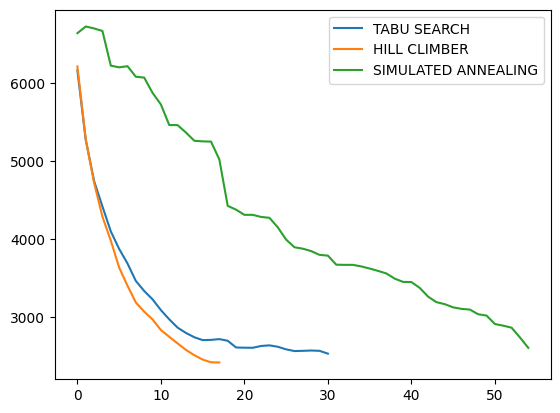

In [ ]:
pp = PathPlotter()
pp.plot(a)

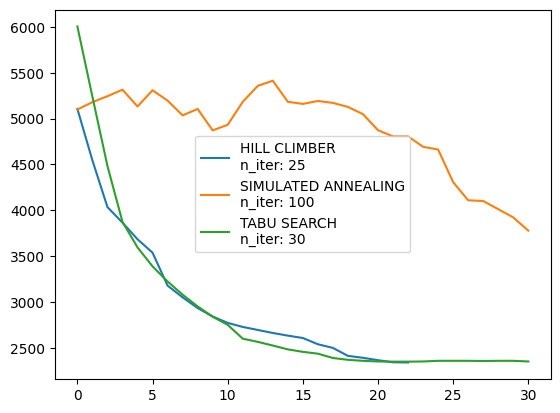

In [ ]:
bp = BenchmarkPlotter()
bp.plot([a, b, c])

In [ ]:
dhp = DistanceHistoryPlotter()
dhp.plot([a, b, c], labels = ["Hill Climber", "SimulatedAnnealing", "Tabu Search"])